Number of intra-color edges: 9898
Number of inter-color edges: 109
Total possible intra-color edges: 999000.0
Total possible inter-color edges: 1000000
Fraction of intra-color edges: 0.009907907907907907
Fraction of inter-color edges: 0.000109


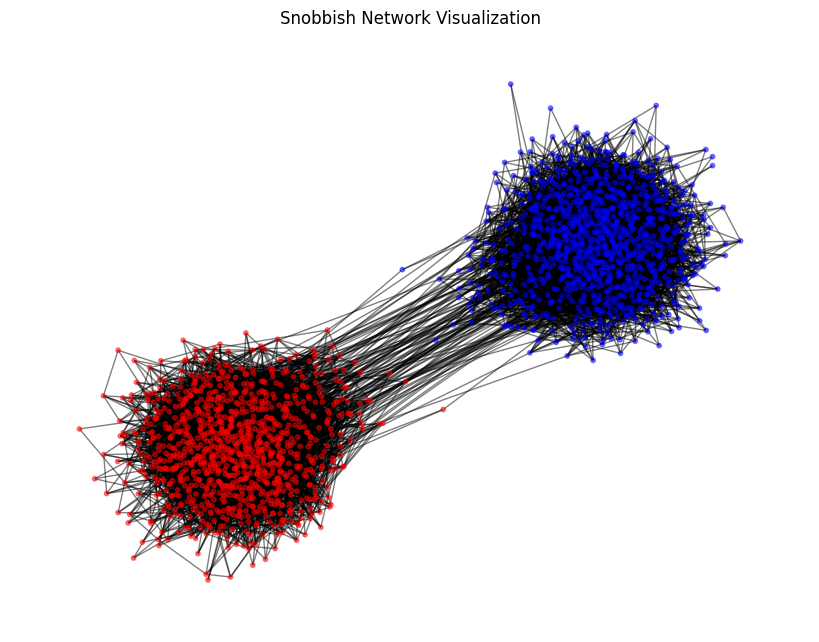

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_nodes = 1000  # Number of nodes in each color group
intra_color_prob = 0.01  # Probability of intra-color connections (p)
inter_color_prob = 0.0001  # Probability of inter-color connections (q)

# Create snobbish network
G_snobbish = nx.Graph()
nodes_red = ['r' + str(i) for i in range(num_nodes)]
nodes_blue = ['b' + str(i) for i in range(num_nodes)]
G_snobbish.add_nodes_from(nodes_red, color='red')
G_snobbish.add_nodes_from(nodes_blue, color='blue')

# Add intra-color edges with probability p
intra_color_edges = 0
for node_set in [nodes_red, nodes_blue]:
    for i in range(len(node_set)):
        for j in range(i + 1, len(node_set)):
            if np.random.rand() < intra_color_prob:
                G_snobbish.add_edge(node_set[i], node_set[j])
                intra_color_edges += 1

# Add inter-color edges with probability q
inter_color_edges = 0
for red_node in nodes_red:
    for blue_node in nodes_blue:
        if np.random.rand() < inter_color_prob:
            G_snobbish.add_edge(red_node, blue_node)
            inter_color_edges += 1

# Calculate total possible inter-color and intra-color edges
total_intra_color_edges = num_nodes * (num_nodes - 1) / 2 * 2  # Multiply by 2 for both color groups
total_inter_color_edges = num_nodes ** 2

# Calculate fractions
fraction_intra_color = intra_color_edges / total_intra_color_edges
fraction_inter_color = inter_color_edges / total_inter_color_edges

print("Number of intra-color edges:", intra_color_edges)
print("Number of inter-color edges:", inter_color_edges)
print("Total possible intra-color edges:", total_intra_color_edges)
print("Total possible inter-color edges:", total_inter_color_edges)
print("Fraction of intra-color edges:", fraction_intra_color)
print("Fraction of inter-color edges:", fraction_inter_color)

# Plot the snobbish network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_snobbish,)
node_colors = [G_snobbish.nodes[node]['color'] for node in G_snobbish.nodes()]
nx.draw(G_snobbish, pos, node_size=10, alpha=0.5, node_color=node_colors)
plt.title("Snobbish Network Visualization")
plt.show()


In [7]:
print(G_snobbish)
print(f"Average Path Length: {nx.average_shortest_path_length(G_snobbish)}")
print(f"Clustering Coefficient: {nx.average_clustering(G_snobbish)}")

Graph with 2000 nodes and 10007 edges
Average Path Length: 4.038614807403702
Clustering Coefficient: 0.009735153586112705


In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_nodes = 1000  # Number of nodes in each color group
intra_color_prob = 0.01  # Probability of intra-color connections (p)
inter_color_prob = 0.0001  # Probability of inter-color connections (q)

# Create snobbish network
G_snobbish = nx.Graph()
nodes_red = ['r' + str(i) for i in range(num_nodes)]
nodes_blue = ['b' + str(i) for i in range(num_nodes)]
G_snobbish.add_nodes_from(nodes_red, color='red')
G_snobbish.add_nodes_from(nodes_blue, color='blue')

# Add intra-color edges with probability p
intra_color_edges = 0
for node_set in [nodes_red, nodes_blue]:
    for i in range(len(node_set)):
        for j in range(i + 1, len(node_set)):
            if np.random.rand() < intra_color_prob:
                G_snobbish.add_edge(node_set[i], node_set[j])
                intra_color_edges += 1

# Add inter-color edges with probability q
inter_color_edges = 0
for red_node in nodes_red:
    for blue_node in nodes_blue:
        if np.random.rand() < inter_color_prob:
            G_snobbish.add_edge(red_node, blue_node)
            inter_color_edges += 1
            
# Extract red and blue subnetworks from G_snobbish
G_red = nx.Graph()
G_blue = nx.Graph()

for node, data in G_snobbish.nodes(data=True):
    if data['color'] == 'red':
        G_red.add_node(node, color='red')
    elif data['color'] == 'blue':
        G_blue.add_node(node, color='blue')

for u, v, data in G_snobbish.edges(data=True):
    if G_snobbish.nodes[u]['color'] == 'red' and G_snobbish.nodes[v]['color'] == 'red':
        G_red.add_edge(u, v, **data)
    elif G_snobbish.nodes[u]['color'] == 'blue' and G_snobbish.nodes[v]['color'] == 'blue':
        G_blue.add_edge(u, v, **data)

# Calculate average path distance and clustering coefficient for red subnetwork
average_path_red = nx.average_shortest_path_length(G_red)
clustering_coefficient_red = nx.average_clustering(G_red)

# Calculate average path distance and clustering coefficient for blue subnetwork
average_path_blue = nx.average_shortest_path_length(G_blue)
clustering_coefficient_blue = nx.average_clustering(G_blue)

print("Red Subnetwork:")
print("Average Path Distance:", average_path_red)
print("Clustering Coefficient:", clustering_coefficient_red)

print("\nBlue Subnetwork:")
print("Average Path Distance:", average_path_blue)
print("Clustering Coefficient:", clustering_coefficient_blue)

Red Subnetwork:
Average Path Distance: 3.2598818818818818
Clustering Coefficient: 0.010686074168349716

Blue Subnetwork:
Average Path Distance: 3.219867867867868
Clustering Coefficient: 0.01010062434125903


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_connected_snobbish_network(N, p, q):
    G = nx.Graph()
    blue_nodes = range(N)
    red_nodes = range(N, 2*N)

    G.add_nodes_from(blue_nodes)
    G.add_nodes_from(red_nodes)

    # Connect blue nodes
    for i in range(N):
        for j in range(i+1, N):
            if i != j and random.random() < p:
                G.add_edge(i, j)

    # Connect red nodes
    for i in range(N, 2*N):
        for j in range(i+1, 2*N):
            if i != j and random.random() < p:
                G.add_edge(i, j)

    # Connect blue-red pairs
    for i in range(N):
        j = random.choice(range(N, 2*N))
        if random.random() < q:
            G.add_edge(i, j)

    return G

# Vary N (network sizes)
N_values = [100, 200, 500, 1000, 2000]
p = 0.8
q = 0.1

avg_path_lengths = []
clustering_coefficients = []

for N in N_values:
    snobbish_net = create_connected_snobbish_network(N, p, q)
    avg_path_length = nx.average_shortest_path_length(snobbish_net)
    clustering_coefficient = nx.average_clustering(snobbish_net)
    avg_path_lengths.append(avg_path_length)
    clustering_coefficients.append(clustering_coefficient)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(N_values, avg_path_lengths, marker='o')
plt.xlabel("Network Size (N)")
plt.ylabel("Average Path Length")
plt.title("Average Path Length vs. Network Size")

plt.subplot(2, 1, 2)
plt.plot(N_values, clustering_coefficients, marker='o', color='orange')
plt.xlabel("Network Size (N)")
plt.ylabel("Clustering Coefficient")
plt.title("Clustering Coefficient vs. Network Size")

plt.tight_layout()
plt.show()
